In [1]:
from numpy import *
import numpy as np
import time
from copy import copy, deepcopy
import pandas as pd

In [2]:
def dsig(value, sig_digits):
    if value == 0:
        return 0
    return value

In [ ]:
#generate test data

In [3]:
test_data_range=1100

In [4]:
def generate_test_data(test_range):
    test_cases = {}
    for case in range(100, test_range, 100):
        matrix_A = [[dsig(random.random(), sig_digits=5) for _ in range(case)]for _ in range(case)]
        matrix_b = [dsig(random.random(), sig_digits=5) for _ in range(case)]
        test_cases[case] = {'matrix_A': matrix_A, 'matrix_b': matrix_b}

    return test_cases

In [5]:
test_suit = generate_test_data(test_data_range)
for each_case in test_suit.items():
    print(each_case[0])
    print(f"matrix_A: {len(each_case[1]['matrix_A'])} * {len(each_case[1]['matrix_A'][0])}")
    print(f"matrix_b: {len(each_case[1]['matrix_b'])}")
    print("-"*30)

100
matrix_A: 100 * 100
matrix_b: 100
------------------------------
200
matrix_A: 200 * 200
matrix_b: 200
------------------------------
300
matrix_A: 300 * 300
matrix_b: 300
------------------------------
400
matrix_A: 400 * 400
matrix_b: 400
------------------------------
500
matrix_A: 500 * 500
matrix_b: 500
------------------------------
600
matrix_A: 600 * 600
matrix_b: 600
------------------------------
700
matrix_A: 700 * 700
matrix_b: 700
------------------------------
800
matrix_A: 800 * 800
matrix_b: 800
------------------------------
900
matrix_A: 900 * 900
matrix_b: 900
------------------------------
1000
matrix_A: 1000 * 1000
matrix_b: 1000
------------------------------


In [ ]:
#without pivoting

In [40]:
def forward_elimination(A,b,n,digit):
    #forward elimination
    for k in range (0,n-1):             #row is k
        for i in range(k+1,n):
            factor=A[i,k] / A[k,k]
            A[i][k]=0
            for j in range(k+1,n):
                A[i,j]=A[i,j]-(factor*A[k,j])
            b[i]=b[i]-(factor*b[k])

In [41]:
def backward_sub(A,b,n,digit):
    x=np.zeros(n)
    x[n-1] = b[n-1]/A[n-1,n-1]
    for row in range(n-2,-1,-1):
        sum = b[row]
        for j in range(row+1,n):
            sum=sum -(A[row,j] * x[j])
        x[row]=sum/A[row,row]

In [42]:
def gauss_without_pivoting(A,b,digit):
    A = np.array(A)
    b = np.array(b)
    matrixA = np.matrix.copy(A)
    matrixb = np.matrix.copy(b)
    n=len(b)
    forward_elimination(A,b,n,digit)
    backward_sub(matrixA,matrixb,n,digit)

In [43]:
time_taken = {}
for case_key, each_case in test_suit.items():
    print(case_key)
    st_time = time.time()
    gauss_without_pivoting(A = deepcopy(each_case['matrix_A']), b = deepcopy(each_case['matrix_b']), digit=5)
    time_taken = time.time() - st_time
    each_case['without_pivoting_time_taken'] = time_taken
    print(each_case['without_pivoting_time_taken'])
    print("+"*30, "\n\n")

100
0.5410478115081787
++++++++++++++++++++++++++++++ 


200
3.6659600734710693
++++++++++++++++++++++++++++++ 


300
11.300911664962769
++++++++++++++++++++++++++++++ 


400
27.304182052612305
++++++++++++++++++++++++++++++ 


500
56.21130561828613
++++++++++++++++++++++++++++++ 


600
125.85508751869202
++++++++++++++++++++++++++++++ 


700


KeyboardInterrupt: 

In [ ]:
#with_pivoting

In [19]:
def forward_with_pivoting(A,b,n,digit):        
    #forward elimination
    for k in range (0,n-1):             #row is k
        for s in range (k+1,n):
            if (abs(A[s][k]) > abs(A[k][k])):
                temp = np.copy(A[k])
                A[k] = A[s]
                A[s] = temp
            factor=A[s,k] / A[k,k]
            A[s][k]=0
            for j in range(k+1,n):
                A[s,j]=A[s,j]-(factor*A[k,j])
            b[s]=b[s]-(factor*b[k])

In [20]:
def backward_with_pivoting(A,b,n,digit):
    x=np.zeros(n)
    x[n-1] = b[n-1]/A[n-1,n-1]
    for row in range(n-2,-1,-1):
        sum = b[row]
        for j in range(row+1,n):
            sum=sum -(A[row,j] * x[j])
        x[row]=sum/A[row,row]

In [21]:
def gauss_with_pivoting(A,b,digit):
    A = np.array(A)
    b = np.array(b)
    matrixA = np.matrix.copy(A)
    matrixb = np.matrix.copy(b)
    n=len(b)
    forward_with_pivoting(A,b,n,digit)
    backward_with_pivoting(matrixA,matrixb,n,digit)

In [22]:
time_taken = {}
for case_key, each_case in test_suit.items():
    print(case_key)
    st_time = time.time()
    solution = gauss_with_pivoting(A = deepcopy(each_case['matrix_A']), b = deepcopy(each_case['matrix_b']), digit=5)
    time_taken = time.time() - st_time
    each_case['with_pivoting_time_taken'] = time_taken
    print(each_case['with_pivoting_time_taken'])
    print("+"*30, "\n\n")

100
0.6138951778411865
++++++++++++++++++++++++++++++ 


200
2.905214548110962
++++++++++++++++++++++++++++++ 


300
9.282733678817749
++++++++++++++++++++++++++++++ 


400
23.88886785507202
++++++++++++++++++++++++++++++ 


500
41.356865882873535
++++++++++++++++++++++++++++++ 


600
69.28981804847717
++++++++++++++++++++++++++++++ 


700
101.96471977233887
++++++++++++++++++++++++++++++ 


800
161.20420670509338
++++++++++++++++++++++++++++++ 


900
215.98686337471008
++++++++++++++++++++++++++++++ 


1000
305.5670003890991
++++++++++++++++++++++++++++++ 




In [25]:
def guass_theoretical_time(n: int):
    """
    n: Number of row / columns in a square matrix
    """
    # Operation count for addition
    ref_addition = int((n*(n+1)*(2*n+1))/ 6) # Number of addition for REF
    backsub_addition = int((n * (n - 1)) / 2)
    total_addition = ref_addition + backsub_addition
    
    # Operation count for multiplication
    total_multiplication = total_addition # Same as addition
    
    # Operation count for division
    ref_division = int((n * (n-1)) / 2)
    backsub_division = n
    total_division = ref_division + backsub_division

    operation_count = {
        'addition': total_addition,
        'multiplication': total_multiplication,
        'division': total_division
    }
    # Summarize
    theory_time = (total_addition*(0.0000001326451301574707))+(total_multiplication*(0.0000002383575439453125))+(total_division*(0.0000002373650074005127))
#     theory_time = (total_addition*100.7649)+(total_multiplication*219.9155)+(total_division*230.5042)
#     theory_time = (theory_time_ns*(10**-9))
    return theory_time
    

In [26]:
for case_id, each_case in test_suit.items():
    print(case_id)
    print(guass_theoretical_time(n=case_id))
    print("="*30, "\n")
    theo_time = guass_theoretical_time(n=case_id)
    each_case['theoretical_time'] = theo_time

100
0.12856391130685807

200
1.0089268743753435

300
3.383094237411022

400
7.993071348619462

500
15.580863556206227

600
26.888476208376883

700
42.657914653337

800
63.631184239292146

900
90.55029031444789

1000
124.15723822700976



In [28]:
eff = {'test_case': [], 'with_pivoting_time_taken': [], 'without_pivoting_time_taken': [],'theoretical_time': []}

for k, v in test_suit.items():
    eff['test_case'].append(k)
    eff['with_pivoting_time_taken'].append(v['with_pivoting_time_taken'])
    eff['without_pivoting_time_taken'].append(v['without_pivoting_time_taken'])
    eff['theoretical_time'].append(v['theoretical_time'])
    
efficiency_df = pd.DataFrame(eff)
efficiency_df

,test_case,with_pivoting_time_taken,without_pivoting_time_taken,theoretical_time
0,100,0.613895,0.439973,0.128564
1,200,2.905215,3.591552,1.008927
2,300,9.282734,13.785095,3.383094
3,400,23.888868,27.448293,7.993071
4,500,41.356866,49.886275,15.580864
5,600,69.289818,83.665443,26.888476
6,700,101.964720,131.391162,42.657915
7,800,161.204207,193.285756,63.631184
8,900,215.986863,310.580924,90.550290
9,1000,305.567000,420.086969,124.157238


In [29]:
efficiency_df['log_n'] = np.log(efficiency_df['test_case'])
efficiency_df['log_with_pivoting_time_taken'] = np.log(efficiency_df['with_pivoting_time_taken'])
efficiency_df['log_without_pivoting_time_taken'] = np.log(efficiency_df['without_pivoting_time_taken'])
efficiency_df

,test_case,with_pivoting_time_taken,without_pivoting_time_taken,theoretical_time,log_n,log_with_pivoting_time_taken,log_without_pivoting_time_taken
0,100,0.613895,0.439973,0.128564,4.605170,-0.487931,-0.821042
1,200,2.905215,3.591552,1.008927,5.298317,1.066507,1.278584
2,300,9.282734,13.785095,3.383094,5.703782,2.228156,2.623588
3,400,23.888868,27.448293,7.993071,5.991465,3.173413,3.312304
4,500,41.356866,49.886275,15.580864,6.214608,3.722238,3.909746
5,600,69.289818,83.665443,26.888476,6.396930,4.238298,4.426826
6,700,101.964720,131.391162,42.657915,6.551080,4.624627,4.878179
7,800,161.204207,193.285756,63.631184,6.684612,5.082672,5.264170
8,900,215.986863,310.580924,90.550290,6.802395,5.375218,5.738444
9,1000,305.567000,420.086969,124.157238,6.907755,5.722169,6.040462


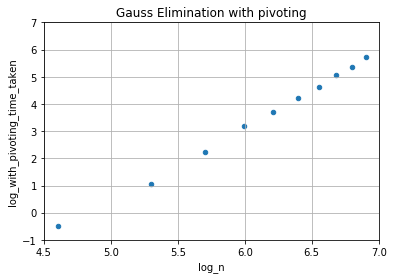

In [33]:
x = 'log_n'
y = 'log_with_pivoting_time_taken'
efficiency_df.plot.scatter(x,y,title ="Gauss Elimination with pivoting", grid = True,
                           xlim = (4.5,7), ylim = (-1,7))

In [34]:
def calculate_slope(x: list, y: list):
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    
    numerator = sum([(i-mean_x) * (j-mean_y) for i,j in zip(x, y)])
    dinominator = sum([(i-mean_x)**2 for i in x])
    
    return numerator / dinominator


def calculate_y_intercept(mean_x, mean_y, m):
    return mean_y - (m * mean_x)

In [35]:
def roundto_d_significant(value, sig_digits):
    if value == 0:
        return 0
    return round(value, sig_digits - int(math.floor(math.log(abs(value)))) - 1)

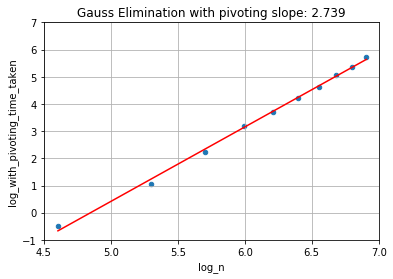

In [36]:
# Calculating slope and y-intercept
m = calculate_slope(x=efficiency_df['log_n'], y=efficiency_df['log_with_pivoting_time_taken'])
y_intercept = calculate_y_intercept(mean_x=efficiency_df['log_n'].mean(), 
                                    mean_y=efficiency_df['log_with_pivoting_time_taken'].mean(),
                                    m=m)
# Rounding off
m = roundto_d_significant(m, sig_digits=5)
y_intercept = roundto_d_significant(y_intercept, sig_digits=5)

# Fit the line and plot
efficiency_df['log_with_pivoting_fitted_y'] = efficiency_df['log_n'].map(lambda x: m * x + y_intercept)
ax = efficiency_df.plot.scatter(x = 'log_n', y = 'log_with_pivoting_time_taken', grid = True, 
                                title = f"Gauss Elimination with pivoting slope: {m}",xlim = (4.5,7), ylim = (-1,7))
efficiency_df.plot(x = 'log_n', y = 'log_with_pivoting_fitted_y', color='red' ,grid = True,legend=False, ax=ax,
                   xlim = (4.5,7), ylim = (-1,7))


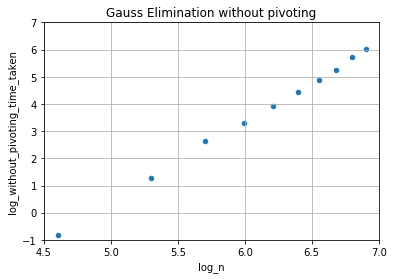

In [37]:
x = 'log_n'
y = 'log_without_pivoting_time_taken'
efficiency_df.plot.scatter(x,y, title = "Gauss Elimination without pivoting",grid = True,xlim = (4.5,7), ylim = (-1,7))

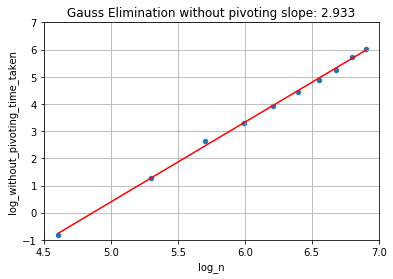

In [39]:
# Calculating slope and y-intercept
m = calculate_slope(x=efficiency_df['log_n'], y=efficiency_df['log_without_pivoting_time_taken'])
y_intercept = calculate_y_intercept(mean_x=efficiency_df['log_n'].mean(), 
                                    mean_y=efficiency_df['log_without_pivoting_time_taken'].mean(),
                                    m=m)
# Rounding off
m = roundto_d_significant(m, sig_digits=5)
y_intercept = roundto_d_significant(y_intercept, sig_digits=5)

# Fit the line and plot
efficiency_df['log_without_pivoting_fitted_y'] = efficiency_df['log_n'].map(lambda x: m * x + y_intercept)
ax = efficiency_df.plot.scatter(x = 'log_n', y = 'log_without_pivoting_time_taken', grid = True, 
                                title = f"Gauss Elimination without pivoting slope: {m}",xlim = (4.5,7), ylim = (-1,7))
efficiency_df.plot(x = 'log_n', y = 'log_without_pivoting_fitted_y', color='red' ,grid = True,legend=False, ax=ax
                  ,xlim = (4.5,7), ylim = (-1,7))
